In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import files

In [5]:
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [6]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#replace the blank values and change the data type
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['customerID'].duplicated().sum()

np.int64(0)

In [16]:
#converted 0 and 1 value of senior citizen to yes and no
def con(value):
  if value==1:
    return "yes"
  else:
    return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(con)

In [17]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1819,6701-DHKWQ,Female,no,Yes,Yes,61,No,No phone service,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),51.35,3244.40,No
3515,5206-HPJKM,Male,no,No,No,17,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,934.15,No
6361,5309-TAIKL,Female,no,No,No,7,Yes,No,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),62.80,418.30,No
5655,5666-MBJPT,Male,no,No,No,65,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),25.10,1725.00,No
1739,9804-ICWBG,Male,no,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes


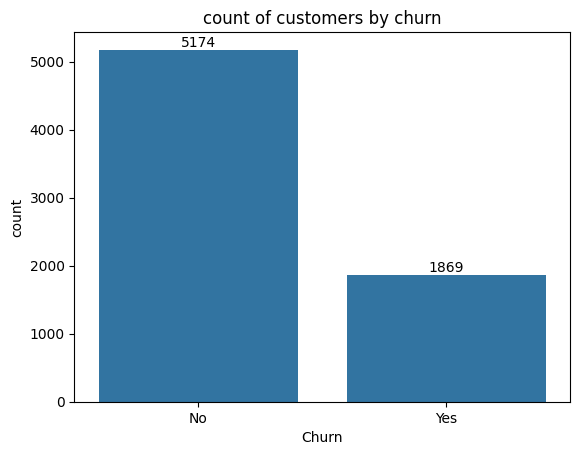

In [18]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

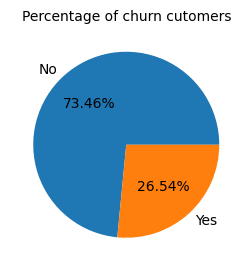

In [19]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of churn cutomers",fontsize=10)
plt.show()

In [20]:
#from the given pie chart we can conclude that 26.54 of our customers have churned out

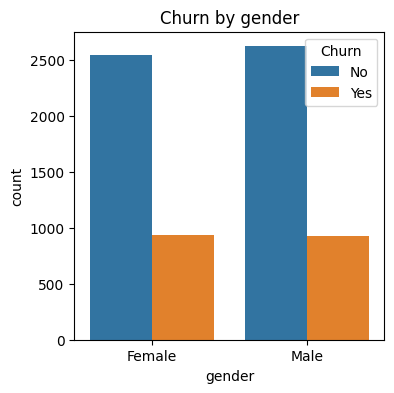

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender',data=df,hue='Churn')
plt.title("Churn by gender")
plt.show()

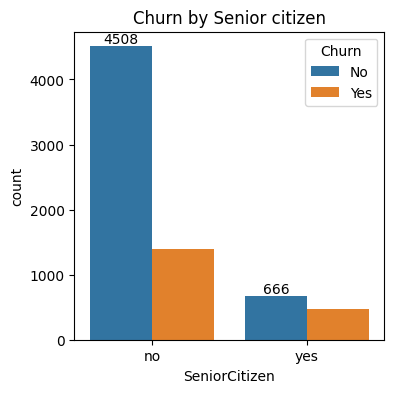

In [22]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior citizen")
plt.show()

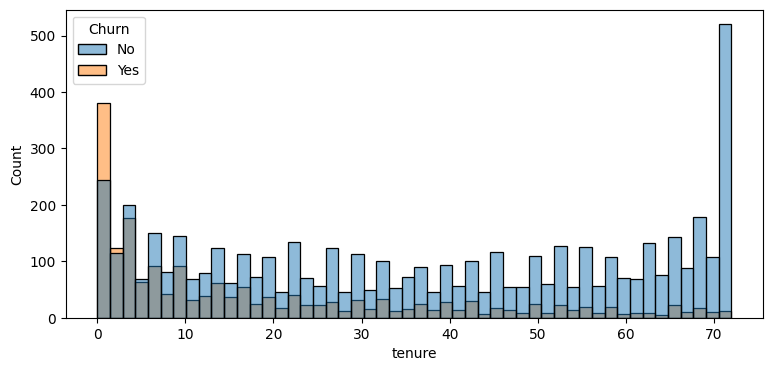

In [26]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=50,hue='Churn')
plt.show()

In [27]:
#people whoo have used the services for long time have stayed and people who have used it for less time have churned out

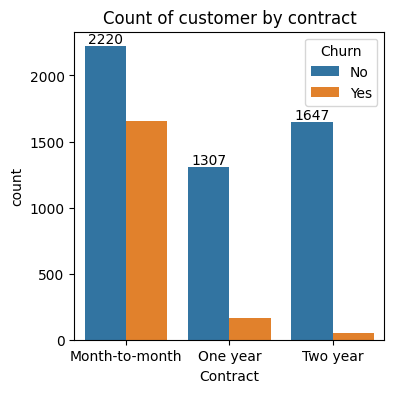

In [28]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customer by contract")
plt.show()

In [29]:
#people whoo have month to month contract are likely to churn than the one who takes one year and two year contract

In [31]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

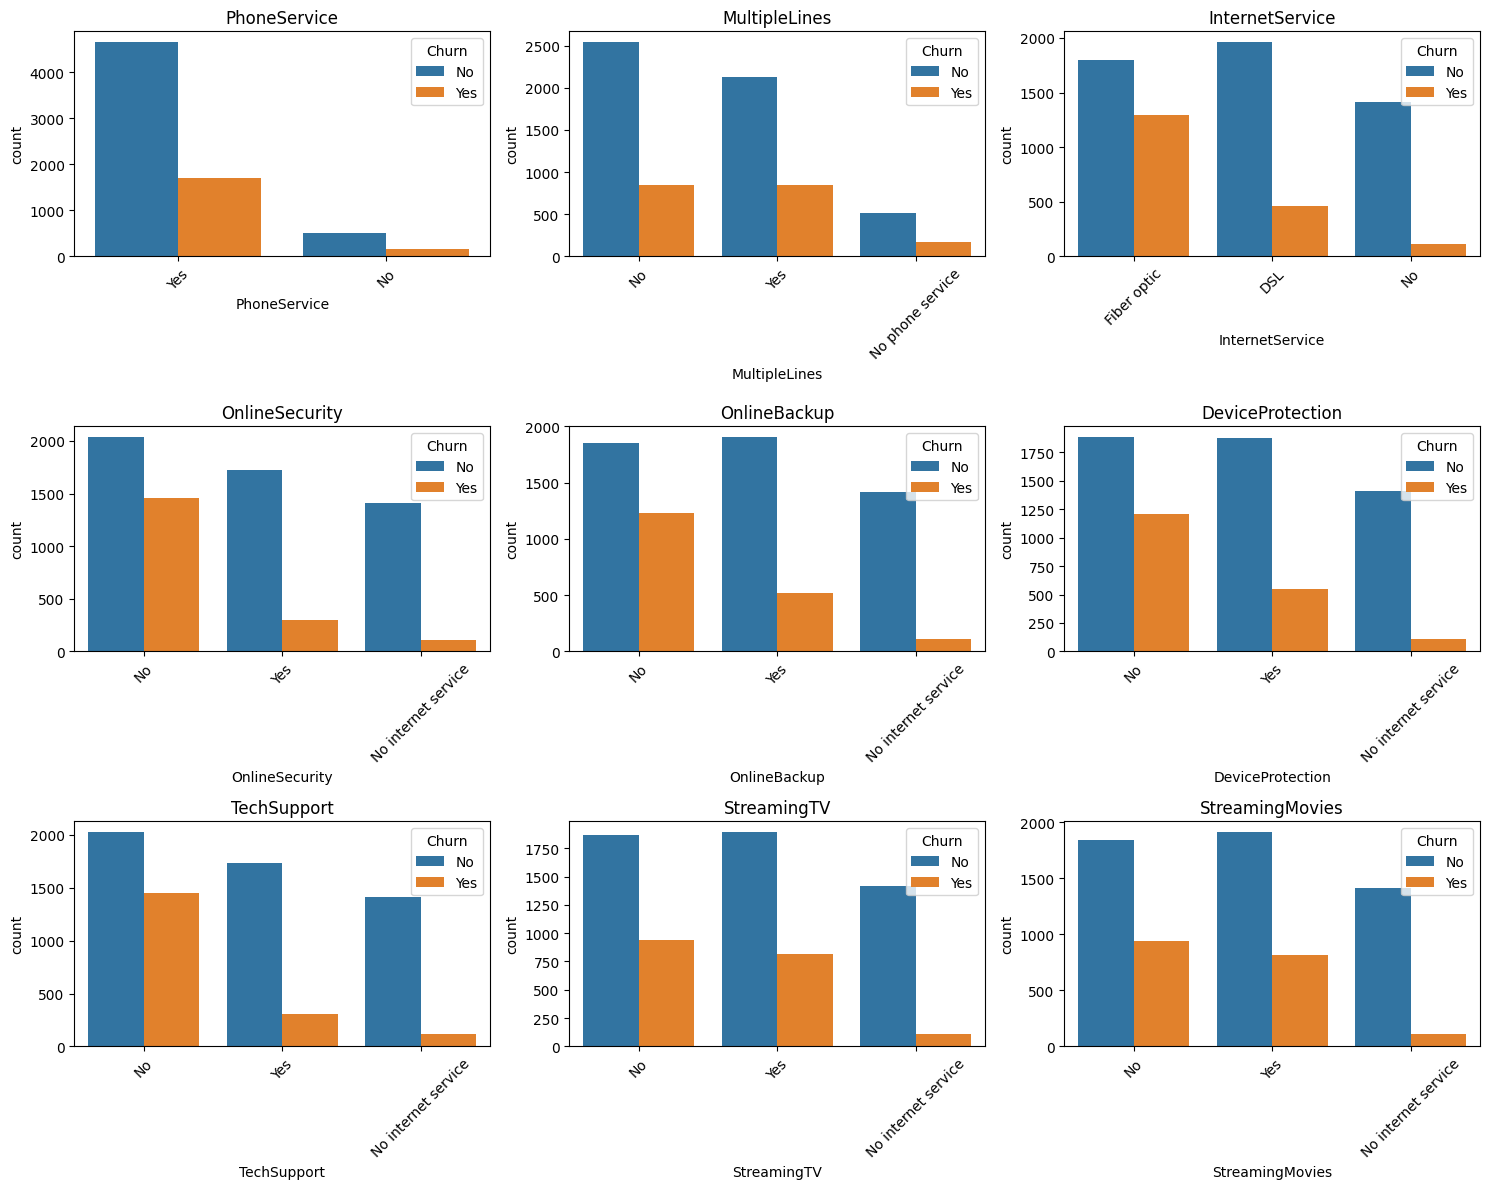

In [33]:
# Assuming your DataFrame is named `df`
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the matplotlib figure
n_cols = 3  # Number of columns in the subplot grid
n_rows = -(-len(columns) // n_cols)  # Ceiling division to determine rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the grid to easily index axes

# Plot each countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df['Churn'], order=df[col].value_counts().index)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [34]:
#as we can see that the people who are using fiber optics and people who dont want online security are likely to churn

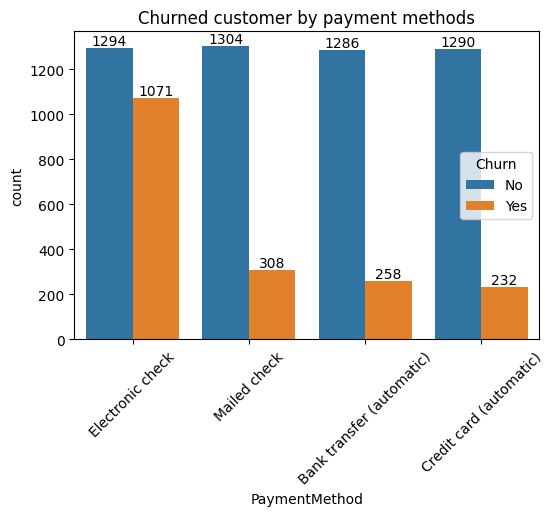

In [35]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod',data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churned customer by payment methods")
plt.show()

In [ ]:
#customers is likely to churn when he is using the electronic check as payment method